In [5]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import dot,power

%matplotlib inline

# Exemple de régression linéaire dans $\mathbb{R}^2$

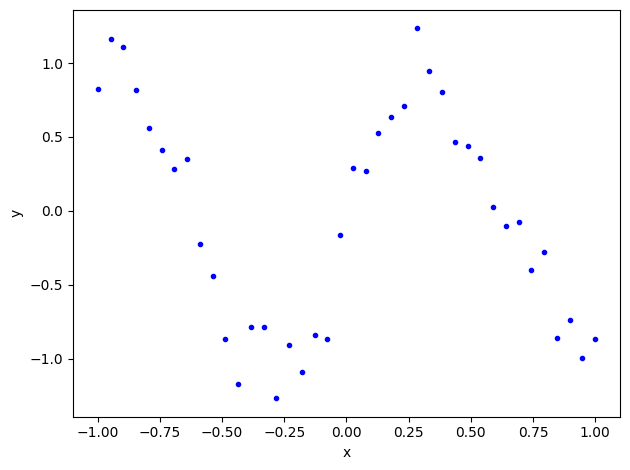

In [61]:
n = 40  

# Vous pouvez changer la fonction
def f(x):
    return np.sin(5*x)[:,None]


x = np.linspace(-1,1,nb_data)
Y = f(x) + np.random.normal(size=(n, 1))*2e-1 

plt.plot(x,Y, '.b')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

In [62]:
Y_pred = np.dot(A,X)

###############################################
# Fonction d'affichage fournie
# x,y : données
# y_pred: y calculé par le modèle 
###############################################
def plot_data_2D(x, y_true, y_pred, title,ax):
    alphas = np.ones(len(x))
    ax.plot(x,y_pred, '-' + 'r')
    
    for i in range(len(x)):
        ax.plot(x[i],y_true[i], '.' + 'k')
        ax.plot([x[i],x[i]], [y_true[i], y_pred[i]], '-'+'b', alpha = alphas[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    xp = np.linspace(-1,1,300)
    ax.plot(xp,f(xp),'g')
    ax.set_title(title)


# Résolution d'un problème aux moindres carrés par le système aux équations normales

Votre travail : 
1. Pour des polynomes de degré [1,3,5,10,20,35,50,100], résoudre le système aux équations normales   $A^\top Ax=A^\top Y$ de plusieurs manières :
- directement en calculant $x=(A^\top A)^{-1} A^\top Y$, en utilisant les fonctions [dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) et [inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)
- en résolvant le système par la méthode [solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html)
- en résolvant aux moindres carrés directement en utilisant la fonction [lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)
- en utilisant la méthode QR, à l'aide le la fonction [qr](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html)

2. Tracer un graphique de l'erreur du modèle en fonction du degré du polynome
3. Evaluer les modèles en ajoutant du bruit aux données d'entrée.
4. Essayer de trouver une manière de déterminer de manière autimatique le "meilleur" modèle

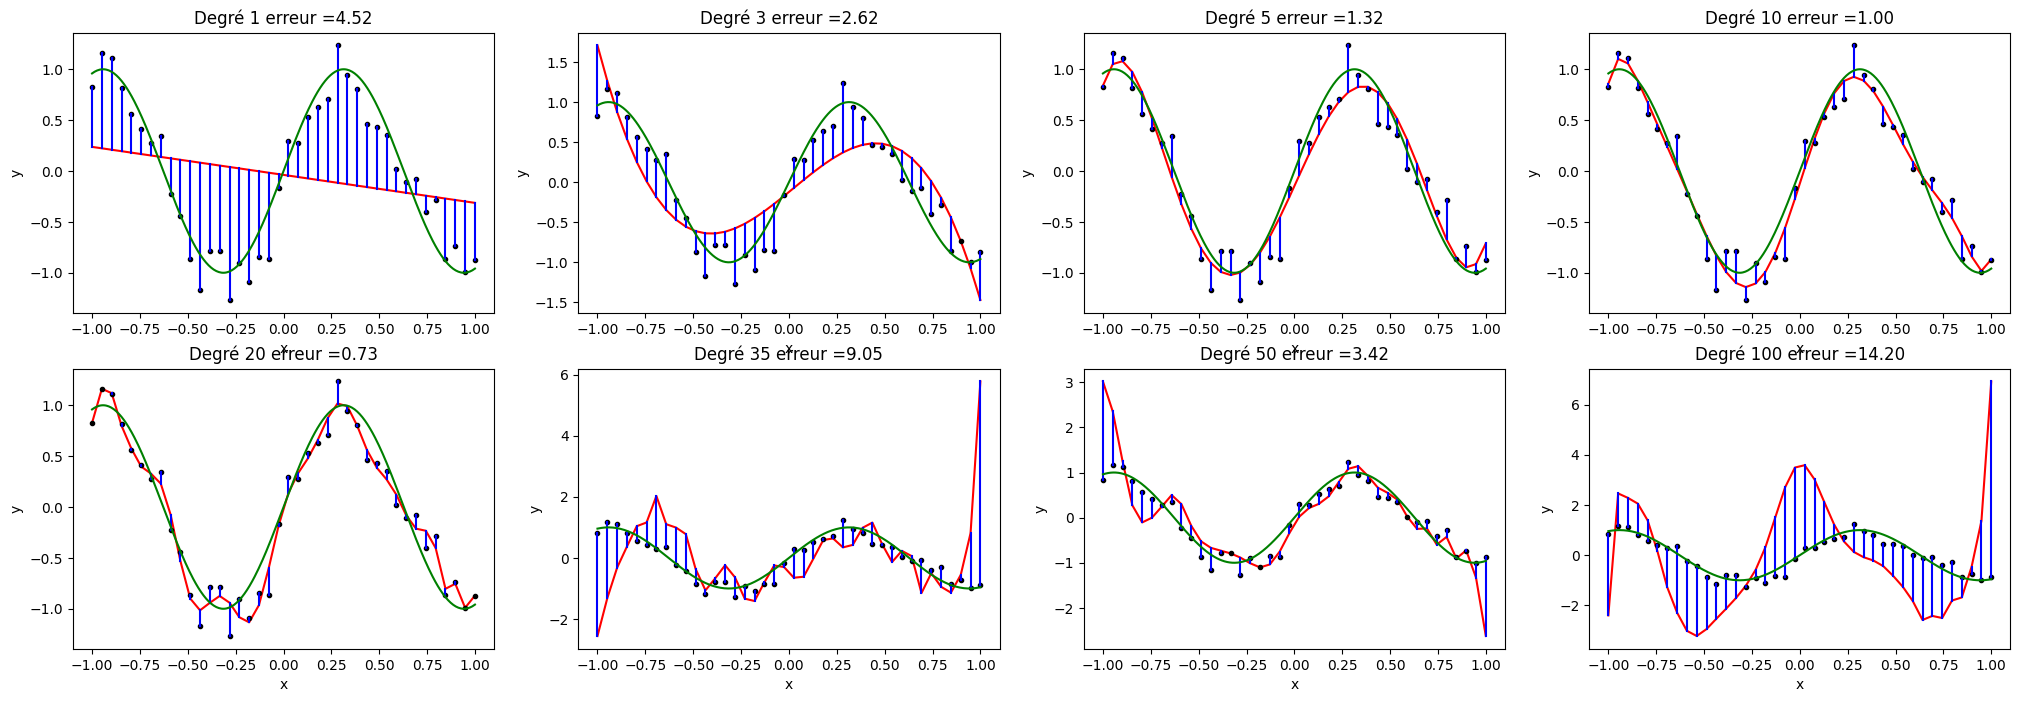

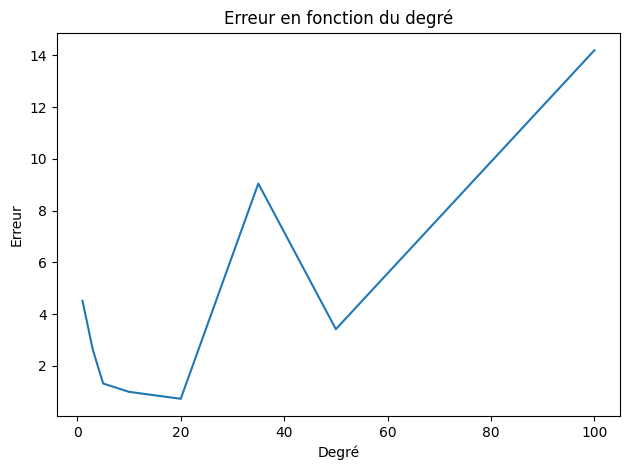

In [63]:
degre = [1,3,5,10,20,35,50,100]
col = int(len(degre)/2)
fig, axs = plt.subplots(2, ncols=col,figsize=(25,8))
err = []

for ind,d in enumerate(degre):
    A = power(x,0)
    for i in range(1,d+1):
        A = np.vstack([A, power(x,i)])
    A = A.T 
    X = dot(inv(dot(A.T,A)),dot(A.T, Y)) 
    e = np.linalg.norm(dot(A,X)-Y)
    err.append(e)
    Y_pred = np.dot(A,X)

    titre = 'Degré ' + str(d) + ' erreur ={0:0.2f}'.format(e)
    plot_data_2D(x,Y,Y_pred,title=titre,ax=axs[int(ind/col)][ind%col])

plt.figure()
plt.plot(degre,err)
plt.title("Erreur en fonction du degré")
plt.xlabel("Degré")
plt.ylabel("Erreur")
plt.tight_layout()